In [1]:
import numpy as np
from qiskit.quantum_info import random_unitary
import matplotlib.pyplot as plt

https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html

In [2]:
RAD = 180 / np.pi

In [3]:
def print_matrix(M):
    for row in M:
        for item in row:
            num = f'{item:.4}'
            print(f'{num:<23}', end=' ')
        print()
    print()

def get_theta(real, imag):
    '''return the theta in radian
    '''
    theta = np.arccos(real)
    if imag > 0:
        return theta
    else:
        return 2*np.pi - theta

# Right (left and right are equal)

### Suppose that the eigen vectors of $U$ are $e^{\pm i \theta}$, why the two eigen values are symmetric on x-axis?

In [111]:
SEED = 2

random unitary U:
(0.1003+0.955j)         (-0.2622-0.09547j)      
(-0.2192-0.1727j)       (-0.8648+0.4174j)       

eigen values: 
 [ 0.15840154+0.98737478j -0.92288942+0.38506508j]
eigen vectors:
 [[ 0.97277278+0.j          0.22883562-0.03670665j]
 [-0.22883562-0.03670665j  0.97277278+0.j        ]]
...
U * e_vector = e_val * e_vector
...
left:  [ 1.54088709e-01+0.96049131j -4.69280808e-06-0.23176091j]
right: [ 1.54088709e-01+0.96049131j -4.69280808e-06-0.23176091j]
...
left:  [-0.19705553+0.12199279j -0.89776171+0.37458083j]
right: [-0.19705553+0.12199279j -0.89776171+0.37458083j]
theta1  = 157.35, theta2  = 80.89
theta1' = 38.23, theta2' = -38.23


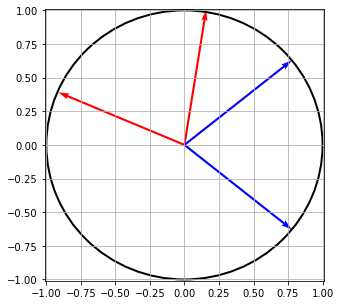

In [112]:
X = random_unitary(2, seed = SEED)._data
print('random unitary U:')
print_matrix(X)
e_vals, e_vectors = np.linalg.eig(X)
print('eigen values: \n', e_vals)
print('eigen vectors:\n', e_vectors)
print('...')
print('U * e_vector = e_val * e_vector')
print('...')
print('left: ', np.dot(X, e_vectors[:, 0]))
print('right:', np.dot(e_vals[0], e_vectors[:, 0]))
print('...')
print('left: ', np.dot(X, e_vectors[:, 1]))
print('right:', np.dot(e_vals[1], e_vectors[:, 1]))

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.set_xlim([-1.01, 1.01])
ax.set_ylim([-1.01, 1.01])
circle = plt.Circle((0, 0), 1, fill=False, linewidth=2)
ax.add_patch(circle)
Ox = [0, 0]
Oy = [0, 0]
Vx = [e_vals[0].real, e_vals[1].real]
Vy = [e_vals[0].imag, e_vals[1].imag]
color = ['r', 'r']
plt.quiver(Ox, Oy, Vx, Vy, units='xy', color=color, scale=1)
theta1 = get_theta(e_vals[0].real, e_vals[0].imag)
theta2 = get_theta(e_vals[1].real, e_vals[1].imag)
theta1, theta2 = max(theta1, theta2), min(theta1, theta2)
theta = abs(theta1 - theta2) / 2
print(f'theta1  = {theta1*RAD:.2f}, theta2  = {theta2*RAD:.2f}')
eigen1 = complex(np.cos(theta), np.sin(theta))
eigen2 = complex(np.cos(theta), -np.sin(theta))
e_vals2 = [eigen1, eigen2]
V2x = [e_vals2[0].real, e_vals2[1].real]
V2y = [e_vals2[0].imag, e_vals2[1].imag]
color = ['b', 'b']
print(f"theta1' = {theta*RAD:.2f}, theta2' = {-theta*RAD:.2f}")
plt.quiver(Ox, Oy, V2x, V2y, units='xy', color=color, scale=1)
plt.grid()
plt.show()

# Eigenvalue and Tensor Product

### Verify the eigen values of $U \otimes U^{-1}: e^{\pm2i\theta}$ ?

In [113]:
# a random unitary matrix U

U = random_unitary(2, seed=SEED)
U = U._data
print_matrix(U)

(0.1003+0.955j)         (-0.2622-0.09547j)      
(-0.2192-0.1727j)       (-0.8648+0.4174j)       



In [114]:
# do an inverse, get U_inv

U_inv = np.linalg.inv(U)
print_matrix(U_inv)
print_matrix(np.dot(U, U_inv))   # see if gets identity matrix

(0.1003-0.955j)         (-0.2192+0.1727j)       
(-0.2622+0.09547j)      (-0.8648-0.4174j)       

(1+2.776e-17j)          -2.776e-17j             
(2.776e-17+0j)          (1+0j)                  



In [115]:
# do a tensor product, get UU_inv

UU_inv = np.kron(U, U_inv)
print_matrix(UU_inv)

(0.9221+2.776e-17j)     (-0.1869-0.192j)        (-0.1175+0.2408j)       (0.07396-0.02435j)      
(-0.1175-0.2408j)       (0.3119-0.8678j)        (0.07787-6.939e-18j)    (0.1869+0.192j)         
(-0.1869+0.192j)        (0.07787-6.939e-18j)    (0.3119+0.8678j)        (0.1175-0.2408j)        
(0.07396+0.02435j)      (0.1175+0.2408j)        (0.1869-0.192j)         (0.9221+0j)             



In [117]:
# get the eigen values of UU_inv

e_vals3, e_vectors3 = np.linalg.eig(UU_inv)
print('eigen values')
print_matrix([e_vals3])

eigen values
(1-2.22e-16j)           (0.234+0.9722j)         (0.234-0.9722j)         (1-1.11e-16j)           



In [118]:
ev1, ev2 = 1, 2

theta1 76.46634748494002
theta2 -76.46634748494


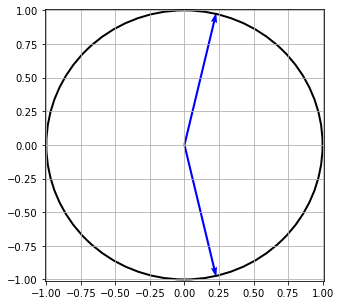

In [119]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.set_xlim([-1.01, 1.01])
ax.set_ylim([-1.01, 1.01])
circle = plt.Circle((0, 0), 1, fill=False, linewidth=2)
ax.add_patch(circle)
Ox = [0, 0]
Oy = [0, 0]
Vx = [e_vals3[ev1].real, e_vals3[ev2].real]
Vy = [e_vals3[ev1].imag, e_vals3[ev2].imag]
color = ['b', 'b']
plt.quiver(Ox, Oy, Vx, Vy, units='xy', color=color, scale=1)
theta1 = get_theta(e_vals3[ev1].real, e_vals3[ev1].imag)
theta2 = get_theta(e_vals3[ev2].real, e_vals3[ev2].imag)
print('theta1', theta1*RAD)
print('theta2', (theta2-2*np.pi)*RAD)
plt.grid()
plt.show()